# Data Cleaning and Preprocessing

This notebook is part of the **DataCleaning** project. It focuses on cleaning and preparing a dataset using Python and widely used data science libraries such as:

- `pandas` for data manipulation  
- `numpy` for numerical operations  
- `matplotlib` and `seaborn` for basic visualization

The aim is to structure the data in a way that makes it suitable for further analysis or machine learning tasks. Steps and techniques are added progressively as the work evolves.


## Data Cleaning

### Dataset

The dataset is Adult.csv

In [294]:
import seaborn as sean
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Table

The below code helps convert the csv file into table format, making it readable. It provides information regarding the column names and their types.

In [295]:
df = pd.read_csv('data/adult.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


The df.head() function in pandas is used to display the first few rows of a DataFrame. Lets display the first 20 rows and view their data.

In [296]:
df.head(20) # Display the first 20 rows of the DataFrame

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


We can also display all rows using: print(df.head(len(df)))
However this might be a bad idea since datasets can be huge, still for experimental purposes we are adding the code below:

In [297]:
print(df.head(len(df))) # Display all the rows of the DataFrame

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

capital.gain seems to be zero at a lot of places, lets look at statistics of its not Null values

In [298]:
df[df['capital.gain'] != 0]['capital.gain'].describe()


count     2712.000000
mean     12938.541298
std      22395.413530
min        114.000000
25%       3411.000000
50%       7298.000000
75%      14084.000000
max      99999.000000
Name: capital.gain, dtype: float64

It seems like this dataset only cares about people in United States, lets confirm whether thats true or not:

In [299]:
df['native.country'].value_counts()

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

Our assumption was wrong, and turns out we don't know the native country of a lot of people.

### Replacing '?'

Let us print the distribution of countries (except '?')

C:\Users\Adite\AppData\Local\Temp\ipykernel_24220\3677050568.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sean.countplot(data=filtered_df, x='native.country', order=filtered_df['native.country'].value_counts().index, palette='viridis')


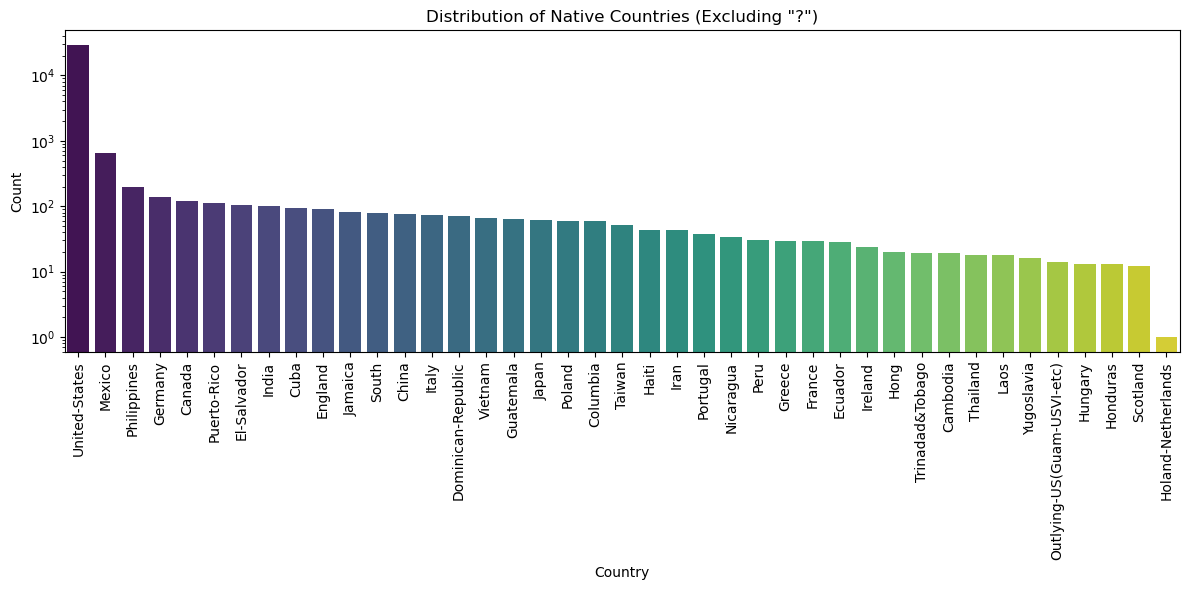

In [300]:
# Filter out rows where native.country is '?'
filtered_df = df[df['native.country'] != '?']

# Plot
plt.figure(figsize=(12, 6))
sean.countplot(data=filtered_df, x='native.country', order=filtered_df['native.country'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.yscale('log')  # Log scale for better visibility of counts
plt.title('Distribution of Native Countries (Excluding "?")')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The ? suggests that the dataset is unaware of the native country of these people. We can either remove these rows, or fill them with some random value, for now we will fill them such that the distirbution is maintained (somewhat).

In [301]:
valid_countries = df[df['native.country'] != '?']['native.country'] # Filtereing out countries having '?'
country_probs = valid_countries.value_counts(normalize=True) # Getting a count of each country
missing_count = (df['native.country'] == '?').sum() # Getting the count of missing values in the column

# Printing the values:
print("Country probabilities: ", country_probs)
print(f"Missing values in 'native.country': {missing_count}")


np.random.seed(0)  # For reproducibility (get same random numbers each time)
fill_values = np.random.choice(
    country_probs.index,
    size=missing_count,
    p=country_probs.values
)

df_copy = df.copy() # Creating a copy of the DataFrame to avoid modifying the original
df_copy['native.country'] = df_copy['native.country'].str.strip()

df_copy.loc[df_copy['native.country'] == '?', 'native.country'] = fill_values # Filling the missing values with the random choices

Country probabilities:  native.country
United-States                 0.912190
Mexico                        0.020108
Philippines                   0.006192
Germany                       0.004284
Canada                        0.003784
Puerto-Rico                   0.003565
El-Salvador                   0.003315
India                         0.003127
Cuba                          0.002971
England                       0.002814
Jamaica                       0.002533
South                         0.002502
China                         0.002345
Italy                         0.002283
Dominican-Republic            0.002189
Vietnam                       0.002095
Guatemala                     0.002001
Japan                         0.001939
Poland                        0.001876
Columbia                      0.001845
Taiwan                        0.001595
Haiti                         0.001376
Iran                          0.001345
Portugal                      0.001157
Nicaragua                

To confirm that '?' have been replaced: 

In [302]:
count_question_mark = df_copy[df_copy['native.country'] == '?'].shape[0]
print("Count of '?' in native.country:", count_question_mark)

Count of '?' in native.country: 0


Lets look at the new distribution.

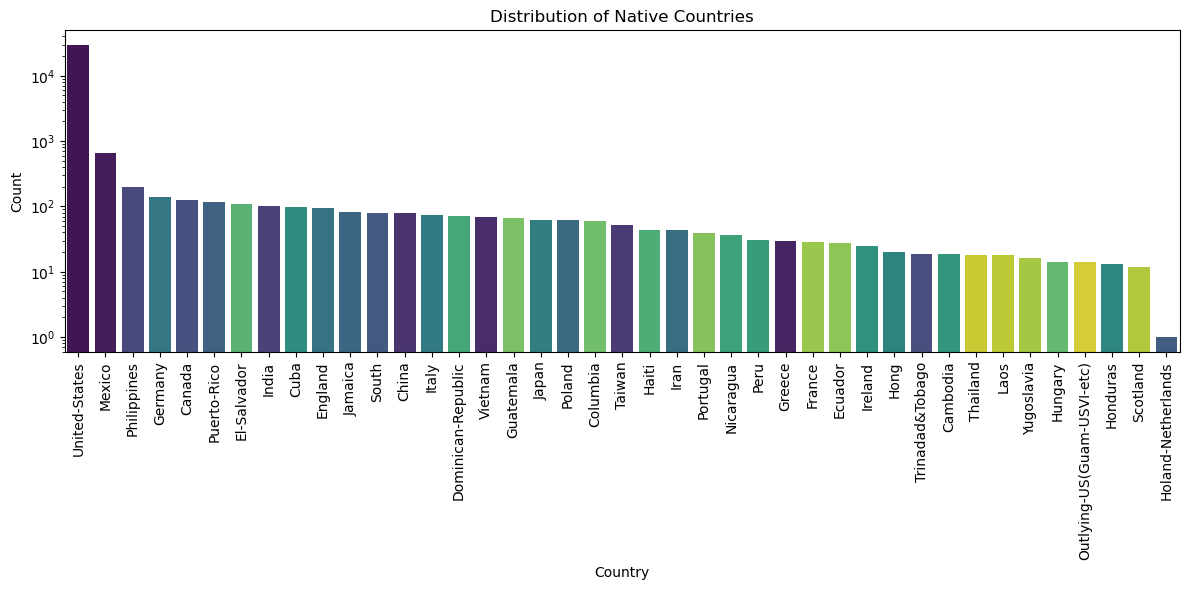

In [303]:
plt.figure(figsize=(12, 6))
# Plotting the distribution of native countries after filling missing values (in copy of df)
sean.countplot(data=df_copy, x='native.country', order=df_copy['native.country'].value_counts().index, palette='viridis', hue='native.country', legend=False)
plt.xticks(rotation=90)
plt.yscale('log')  # Log scale for better visibility of counts
plt.title('Distribution of Native Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

We have printed it in logarithmic scale because United-States has a disproportationately high number.

It can be seen that the distribution of two graphs is almost similar. To compare the distrbution of df_copy and df (without '?'):

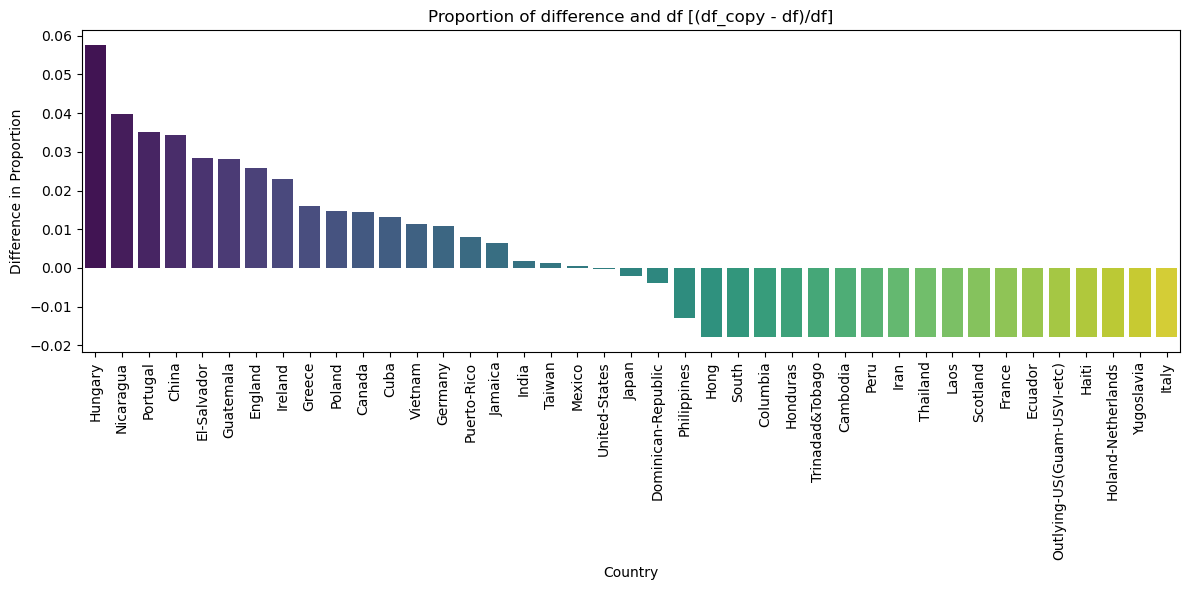

In [304]:
# Get country proportions in the original df (excluding '?')
original_proportions = df[df['native.country'] != '?']['native.country'].value_counts(normalize=True)

# Get country proportions in the modified df_copy (with filled '?')
modified_proportions = df_copy['native.country'].value_counts(normalize=True)

# Compute the difference in proportions between the two DataFrames
country_proportion_diff = ((modified_proportions - original_proportions)/original_proportions)

# Sort the differences in descending order
country_proportion_diff = country_proportion_diff.sort_values(ascending=False)

# Filter out countries with no difference (i.e., where the proportion is zero or negative)
country_proportion_diff = country_proportion_diff[country_proportion_diff != 0]

# Plot the difference in proportions
plt.figure(figsize=(12, 6))
sean.barplot(x=country_proportion_diff.index, y=country_proportion_diff.values, hue=country_proportion_diff.index, palette='viridis', legend=False)

plt.title('Proportion of difference and df [(df_copy - df)/df]')
plt.xlabel('Country')
plt.ylabel('Difference in Proportion')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We took the ratio of difference between the distributions, with the original distirbution (for each country). All the values is less than 0.06, with a median of just less than 0.02, this suggest that the new distribution is pretty accurate. Its also important to note than countries having high counts (like USA and Mexico) have very low ratios.


Hence, we will now make the change in df:

In [305]:
df = df_copy # Update the original df with the modified copy

Like in native country, there are a lot of '?', so lets count those

In [306]:
question_values = (df == '?').sum()  # Count '?' values in each column
print(f"'?' values in each column: {question_values}\n")

'?' values in each column: age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country       0
income               0
dtype: int64



So, now we need to look at workclass and occupation. Lets first generate the distribution for both of them:

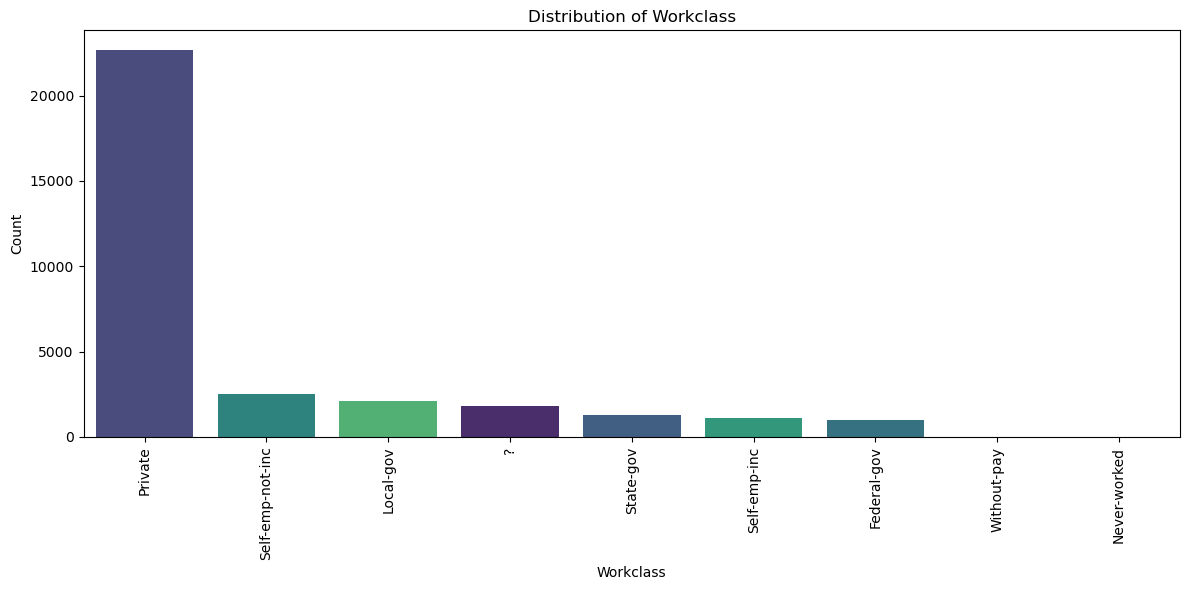

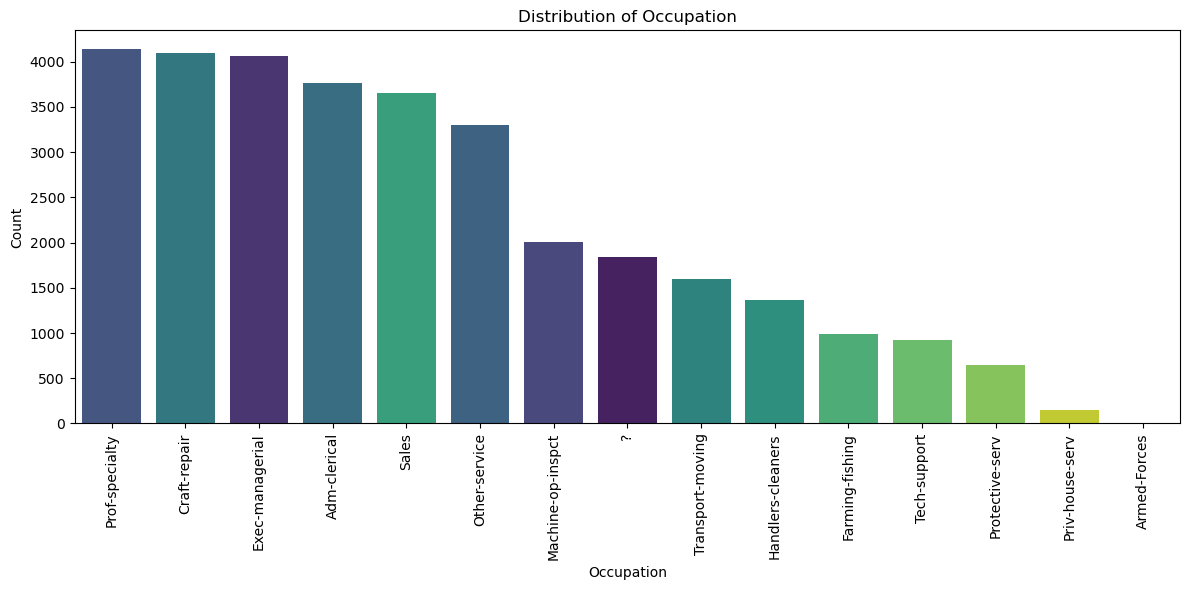

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


In [307]:
# Workclass column
plt.figure(figsize=(12, 6))
# Plotting the distribution of native countries after filling missing values (in copy of df)
sean.countplot(data=df, x='workclass', order=df['workclass'].value_counts().index, palette='viridis', hue='workclass', legend=False)
plt.xticks(rotation=90)
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Occupation column
plt.figure(figsize=(12, 6))
# Plotting the distribution of native countries after filling missing values (in copy of df)
sean.countplot(data=df, x='occupation', order=df['occupation'].value_counts().index, palette='viridis', hue='occupation', legend=False)
plt.xticks(rotation=90)
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print(df['occupation'].value_counts()) # Getting the count of each occupation



Lets do the same thing we did with Native Country, and create a distribution:

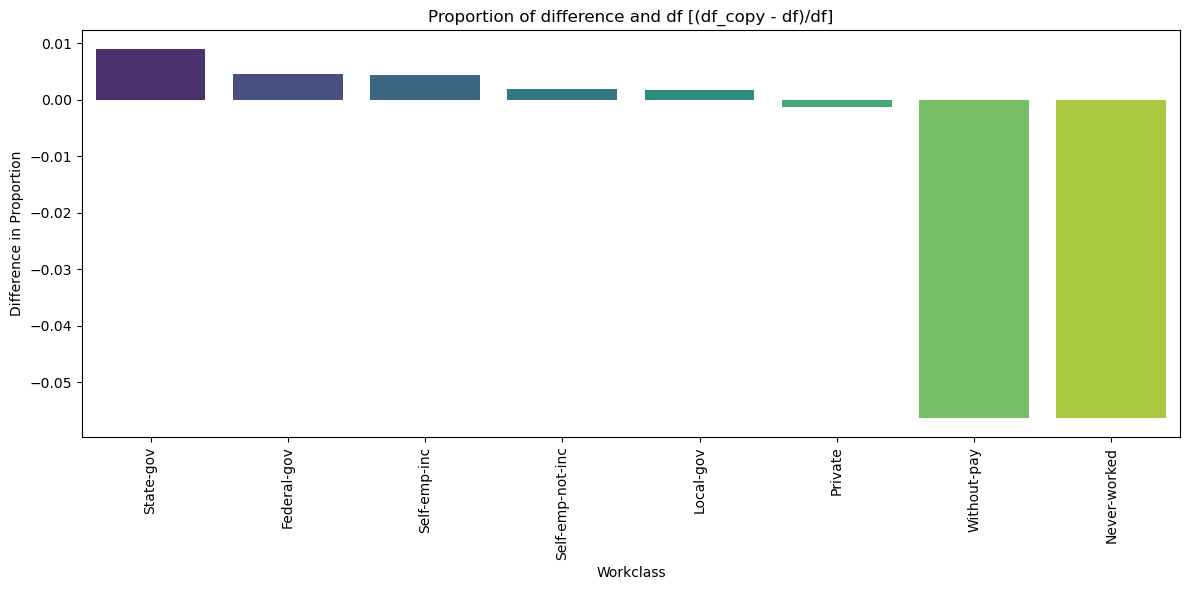

In [308]:
valid_work = df[df['workclass'] != '?']['workclass'] # Filtereing out workclass having '?'
workclass_probs = valid_work.value_counts(normalize=True) # Getting a count of each workclass
missing_count = (df['workclass'] == '?').sum() # Getting the count of missing values in the column

np.random.seed(1)  # For reproducibility (get same random numbers each time)
fill_values = np.random.choice(
    workclass_probs.index,
    size=missing_count,
    p=workclass_probs.values
)

df_copy = df.copy() # Creating a copy of the DataFrame to avoid modifying the original
df_copy['workclass'] = df_copy['workclass'].str.strip()

df_copy.loc[df_copy['workclass'] == '?', 'workclass'] = fill_values # Filling the missing values with the random choices

'''
Now that df_copy has the missing values filled, lets look at the distribution of ratio of difference to original
'''

# Get workclass proportions in the original df (excluding '?')
original_proportions = df[df['workclass'] != '?']['workclass'].value_counts(normalize=True)

# Get workclass proportions in the modified df_copy (with filled '?')
modified_proportions = df_copy['workclass'].value_counts(normalize=True)

# Compute the difference in proportions between the two DataFrames
workclass_proportion_diff = ((modified_proportions - original_proportions)/original_proportions)

# Sort the differences in descending order
workclass_proportion_diff = workclass_proportion_diff.sort_values(ascending=False)

# Filter out countries with no difference (i.e., where the proportion is zero or negative)
workclass_proportion_diff = workclass_proportion_diff[workclass_proportion_diff != 0]

# Plot the difference in proportions
plt.figure(figsize=(12, 6))
sean.barplot(x=workclass_proportion_diff.index, y=workclass_proportion_diff.values, hue=workclass_proportion_diff.index, palette='viridis', legend=False)

plt.title('Proportion of difference and df [(df_copy - df)/df]')
plt.xlabel('Workclass')
plt.ylabel('Difference in Proportion')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The ratios are less then 0.01 for most Workclass, for the last two, its -0.05, lets look at the numbers and decide whether its reasonable or not.

In [309]:
print(df['workclass'].value_counts())
print(df_copy['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
workclass
Private             24022
Self-emp-not-inc     2698
Local-gov            2222
State-gov            1388
Self-emp-inc         1188
Federal-gov          1022
Without-pay            14
Never-worked            7
Name: count, dtype: int64


Since without-pay and never-worked are negligible numbers (14 and 7) its understandable to have them at the same position. If some other approach was implemented, such as fill the values with the mode, then too we would have gotten these ratios.

Lets make these changes permanent.

In [310]:
df = df_copy # Update the original df with the modified copy

We will now do the same for Occupation:

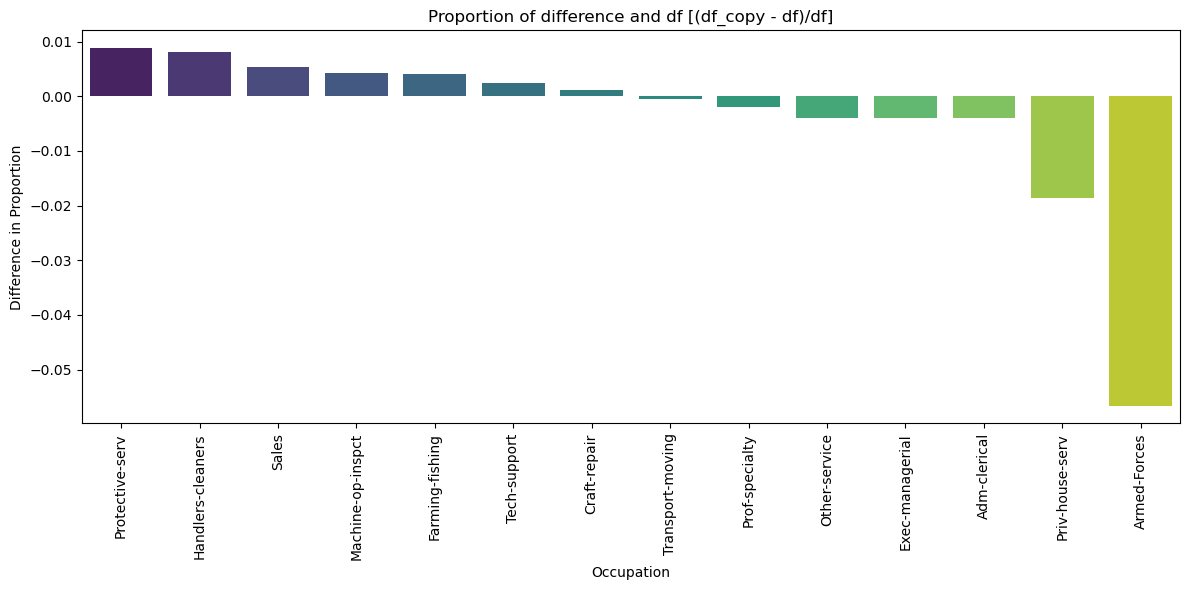

In [311]:
valid_occupation = df[df['occupation'] != '?']['occupation'] # Filtereing out occupation having '?'
occupation_probs = valid_occupation.value_counts(normalize=True) # Getting a count of each occupation
missing_count = (df['occupation'] == '?').sum() # Getting the count of missing values in the column

np.random.seed(1)  # For reproducibility (get same random numbers each time)
fill_values = np.random.choice(
    occupation_probs.index,
    size=missing_count,
    p=occupation_probs.values
)

df_copy = df.copy() # Creating a copy of the DataFrame to avoid modifying the original
df_copy['occupation'] = df_copy['occupation'].str.strip()

df_copy.loc[df_copy['occupation'] == '?', 'occupation'] = fill_values # Filling the missing values with the random choices

'''
Now that df_copy has the missing values filled, lets look at the distribution of ratio of difference to original
'''

# Get occupation proportions in the original df (excluding '?')
original_proportions = df[df['occupation'] != '?']['occupation'].value_counts(normalize=True)

# Get occupation proportions in the modified df_copy (with filled '?')
modified_proportions = df_copy['occupation'].value_counts(normalize=True)

# Compute the difference in proportions between the two DataFrames
occupation_probs_proportion_diff = ((modified_proportions - original_proportions)/original_proportions)

# Sort the differences in descending order
occupation_probs_proportion_diff = occupation_probs_proportion_diff.sort_values(ascending=False)

# Filter out occupation with no difference (i.e., where the proportion is zero or negative)
occupation_probs_proportion_diff = occupation_probs_proportion_diff[occupation_probs_proportion_diff != 0]

# Plot the difference in proportions
plt.figure(figsize=(12, 6))
sean.barplot(x=occupation_probs_proportion_diff.index, y=occupation_probs_proportion_diff.values, hue=occupation_probs_proportion_diff.index, palette='viridis', legend=False)

plt.title('Proportion of difference and df [(df_copy - df)/df]')
plt.xlabel('Occupation')
plt.ylabel('Difference in Proportion')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The distributions again are less than 0.01 except for Armed-Forces and Priv-house-serv, lets look at the numbers.

In [312]:
print(df['occupation'].value_counts(), '\n')
print(df_copy['occupation'].value_counts())

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64 

occupation
Prof-specialty       4380
Craft-repair         4350
Exec-managerial      4293
Adm-clerical         3980
Sales                3890
Other-service        3479
Machine-op-inspct    2131
Transport-moving     1692
Handlers-cleaners    1464
Farming-fishing      1058
Tech-support          986
Protective-serv       694
Priv-house-serv       155
Armed-Forces            9
Name: count, dtype: int64


The same argument can be applied to Armed-Forces and Priv-house-serv. While Priv-house-serv is 155 which is not as insignificant as 9, its ratio is also less than 0.02. Overall the distribution makes sense and hasnt deviated much from the original distribution.

In [313]:
df = df_copy # Update the original df with the modified copy

question_values = (df == '?').sum()  # Count '?' values in each column
print(f"'?' values in each column: {question_values}\n")

'?' values in each column: age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64



All the '?' have been replaced with appropriate values.

### Unusual Values

Lets look at outliers, and if there exist impossible values (say hours/week > total hours in a week)

We should print df once again, so we can rememeber what the columns were:

In [314]:
df.head() # Display the first 5 rows

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Other-service,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Lets define some basic sanity checks for unusual values:
1. Age greater than 90 or less than 10
2. hours per week more than 100 or less than 10
3. The education level more than 16 (The standard is till 16 for doctorate)
4. fnlwgt > 1000000 [fnlwgt represents the number of people that row represents]

In [315]:
# Unusual value conditions
conditions = {
    'age > 90': df_copy['age'] > 90,
    'age < 10': df_copy['age'] < 10,
    'hours.per.week > 100': df_copy['hours.per.week'] > 100,
    'hours.per.week < 10': df_copy['hours.per.week'] < 10,
    'education.num > 16': df_copy['education.num'] > 16,
    'fnlwgt > 1e6': df_copy['fnlwgt'] > 1_000_000,
}

# Evaluate and print how many rows match each condition
print("Unusual Value Counts:\n")
for label, condition in conditions.items():
    count = condition.sum()
    print(f"{label}: {count} rows")

Unusual Value Counts:

age > 90: 0 rows
age < 10: 0 rows
hours.per.week > 100: 0 rows
hours.per.week < 10: 458 rows
education.num > 16: 0 rows
fnlwgt > 1e6: 13 rows


hours.per.week < 10 has 458 instances while fnlwgt > 1000000 has 13. Lets print the fnlwgt.

In [316]:
unusual_fnlwgt = df_copy[df_copy['fnlwgt'] > 1_000_000]
print(unusual_fnlwgt)

       age     workclass   fnlwgt     education  education.num  \
2351    31       Private  1033222     Bachelors             13   
4586    31     State-gov  1033222  Some-college             10   
8882    30       Private  1184622  Some-college             10   
11415   35       Private  1226583     Bachelors             13   
12711   23       Private  1038553       HS-grad              9   
16804   25       Private  1484705  Some-college             10   
17793   29       Private  1268339       HS-grad              9   
18814   45       Private  1366120     Assoc-voc             11   
20027   39       Private  1455435    Assoc-acdm             12   
26064   33       Private  1161363  Some-college             10   
28039   42  Self-emp-inc  1097453     Bachelors             13   
28319   24       Private  1085515       HS-grad              9   
29611   42     Local-gov  1125613       HS-grad              9   

              marital.status         occupation   relationship   race     s

These values feel resonable, even if they aren't, its difficult to comment. Hence we will conclude that even if unusual values exist, they shouldn't be discarded due to lack of information about them.

### Encoding

In many machine learning tasks, datasets contain categorical variables which are features that represent categories rather than numeric values. Most machine learning algorithms require numerical input, so it is essential to convert these categorical variables into a suitable numeric format. This process is called **encoding**.

Encoding techniques such as **Label Encoding** and **One-Hot Encoding** are commonly used to transform categorical data into numbers, enabling algorithms to interpret and learn from the data effectively. The choice of encoding method can impact model performance and should be selected based on the nature of the categorical variable and the requirements of the algorithm.

Let us look at the various categories and decide whether they should be encoded or not, and if they should, then what type of encoding would be best for them.

In [317]:
print(df.columns) # Display the columns of the DataFrame

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


Columns which are already numerical in nature:
1. age
2. fnlwgt
3. education.num (encoding for education)
4. capital.gain
5. capital.loss
5. hours.per.week

The columns left require an encoding, the below table describes what we think would be the best encoding for each of the columns.

| Column            | Type        | Suggested Encoding | Notes |
|-------------------|-------------|--------------------|-------|
| `workclass`       | Nominal     | Not sure   | Too many categories, and no specific order |
| `marital.status`  | Nominal     | Label Encoding   | e.g., Married, Never-married; partial ordering can be setup |
| `occupation`      | Nominal     | Not sure   | Too many categories, and no specific order |
| `relationship`    | Nominal     | One-Hot Encoding   | e.g., Husband, Not-in-family; not too many categories |
| `race`            | Nominal     | One-Hot Encoding   | 5 categories |
| `sex`             | Binary      | Label Encoding     | e.g., Male=1, Female=0 |
| `native.country`  | Nominal     | Not sure | Too many categories, and no specific order |
| `income`          | Binary Target | Label Encoding     | '<=50K' = 0, '>50K' = 1 |



Let us start with Label Encodings, these are for marital.status, sex and income


In [318]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy() # Creating a copy of the DataFrame to avoid modifying the original

# Initialize LabelEncoder for each column
marital_status_encoder = LabelEncoder()
sex_encoder = LabelEncoder()
income_encoder = LabelEncoder()

# Apply LabelEncoder to 'marital.status', 'sex', and 'income'
df_copy['marital.status.label'] = marital_status_encoder.fit_transform(df_copy['marital.status'])
df_copy['sex.label'] = sex_encoder.fit_transform(df_copy['sex'])
df_copy['income.label'] = income_encoder.fit_transform(df_copy['income'])

# Show the first 5 rows to confirm changes
df_copy[['marital.status.label', 'sex.label', 'income.label']].head()

,marital.status.label,sex.label,income.label
0,6,0,0
1,6,0,0
2,6,0,0
3,0,0,0
4,5,0,0


Now that Label Encoding has been implemented (and correctly), we can make these changes permamnent and move onto One-Hot Encoding for relationship and race.

In [322]:
df = df_copy # Update the original df with the modified copy

df_copy = df.copy() # Creating a copy of the DataFrame to avoid modifying the original